# ACnD 5. 状态观测器 (State Observer)

> 卡尔曼滤波器的基础

## 1. 动机

在实际工程系统中，有很多的状态量是测不准的，其中一个最经典的应用是火箭发动机中的卡尔曼观测器。火箭的液氢喷射器的温度需要被稳定在 5000°C，但是传感器在这么高的温度下无法工作，因此只能简介的测量火箭喷嘴外的温度，从而间接的得到液氢燃烧的温度。由于火箭是一个动态系统，因此我们最好使用一个闭环控制器来控制火箭，因此我们引入了状态观测器。

![火箭中的卡尔曼观测器](./pics/kalman_in_jet.png)

## 2. 观测器设计

### 2.1 状态估计

我们首先回顾一下之前学过的状态反馈控制器，其系统方程可以做写作：

$$
\begin{aligned}
&\dot{x} = Ax(t) + Bu(t)\\
&y(t) = Cx(t) + Du(t)
\end{aligned}
$$

其中，我们想要计算出 $\dot{x}$ 就需要知道当前所有状态量，在之前的章节中，我们都默认，所有的状态量都是可测量的，但在实际工程中，可能只有一部分的状态量可以被测量。因此我们想要设计系统的控制器之前，需要先设计一个观测器来预测系统的状态量。

![观测器的框图](./pics/oberver.png)

通过 Luenberger Observer 方程可以得到，一个观测器可以写作：

$$
\begin{aligned}
&\dot{\hat{x}} = A\hat{x} + Bu + L(y-\hat{y})\\
&\hat{y} = C \hat{x} + Du
\end{aligned}
$$

其中，$\hat{x}$ 是状态估计值， $\hat{y}$ 是输出估计值。

通过数学推导，我们可以从上面的式子中得到下面的关系：

$$
\dot{\hat{x}} = (A-LC)\hat{x} + (B-LD)u + Ly
$$

由此可以写出：

$$
\dot{x} - \dot{\hat{x}} = (A-LC)(x-\hat{x})
$$

我们令 $e_x = x-\hat{x}$，则有：

$$
\dot{e_x} = (A-LC)e_x
$$

我们的目标就是令：$e_x = x-\hat{x} \rightarrow 0$。因此设计观测器的关键就是找到 $L$。

### 2.2 例子

假设我们有一个质量-弹簧-阻尼系统，其质量 m = 1, 阻尼 b = 0.5, 弹簧系数 k = 1。其中质量块的速度不可测。

![质量-弹簧-阻尼系统](./pics/mass_spring_damper.png)

> 一般来说会先判断一下系统的可控性和可观测性，但这里先默认其可控和可观测

对该系统建模：

$$
\begin{aligned}
\begin{bmatrix}
    \dot{x_1}\\\dot{x_2}
\end{bmatrix}&=
\begin{bmatrix}
    0 & 1 \\ -\frac{k}{m} & -\frac{B}{m}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
\begin{bmatrix}
0 \\ \frac{1}{m} 
\end{bmatrix}u\\
y &= \begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
\end{aligned}
$$

带入数值可得：

$$
\begin{aligned}
\begin{bmatrix}
    \dot{x_1}\\\dot{x_2}
\end{bmatrix}&=
\begin{bmatrix}
    0 & 1 \\ -1 & -\frac{1}{2}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
\begin{bmatrix}
0 \\ 1 
\end{bmatrix}u\\
y &= \begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
\end{aligned}
$$

接下来设计观测器，令$L = \begin{bmatrix}l_1 \\ l_2\end{bmatrix}$，则：

$$
A-LC = 
\begin{bmatrix}
    0 & 1 \\ -1 & -\frac{1}{2}
\end{bmatrix} - 
\begin{bmatrix}
    l_1 \\ l_2
\end{bmatrix}
\begin{bmatrix}
    1 & 0
\end{bmatrix}=
\begin{bmatrix}
    -l_1 & 1 \\ -1-l_2 & -\frac{1}{2}
\end{bmatrix}
$$

接下来求解 $L$:

令 $|\lambda I - (A-LC)| = 0$，为了使得观测器收敛，这里令特征值 $\lambda_1 = \lambda_2 = -1 < 0$

上面的算式可以写为：

$$
\begin{aligned}
&\lambda^2 + (\frac{1}{2} - l_1)\lambda + 1 + \frac{1}{2} l_1 + l_2 = 0\\
&\text{when:}\\
& \lambda_1 = \lambda_2 = -1,\\
& l_1 = 2.5\qquad l_2 = -1.25
\end{aligned}
$$



由此，我们便可以得到观测器方程：

$$
\begin{aligned}
\dot{\hat{x}} &= (A-LC)\hat{x} + (B-LD)u + Ly\\
&= \begin{bmatrix}
-2.5 & 1 \\
0.25 & -\frac{1}{2}
\end{bmatrix}\hat{x} + 
\begin{bmatrix}
0 \\ 1
\end{bmatrix}u+
\begin{bmatrix}
2.5 \\ -1.25
\end{bmatrix}y
\end{aligned}
$$

该系统在 Simulink 中的框图可以化成：

![系统框图](./pics/block_diagram.png)

从输出结果可以看出，因为系统收敛的非常快，所有其观测量和实际量是重合的。这也符合了我们的需求。

## 3. Matlab 例题

对于 Matlab 来说，我们可以举一个更加复杂的例子。这里我们依然选用之前控制器章节提出的[倒立摆例题](https://zhuanlan.zhihu.com/p/470029508)

![倒立摆问题](../Lec4/pics/pendulum1.png)

我们首先快速的把问题的状态空间模型建立起来：

In [1]:
clear all, close all, clc
m = 1; M = 5; L = 2; g = -10; d = 1;
b = -1; % Pendulum up (b=1)
A = [0 1 0 0;
    0 -d/M b*m*g/M 0;
    0 0 0 1;
    0 -b*d/(M*L) -b*(m+M)*g/(M*L) 0];
B = [0; 1/M; 0; b*1/(M*L)];

关于观测器，我们首先需要知道系统的可观测性。该系统共有四个状态量，$[x, \dot{x}, \theta, \dot{\theta}]$。可观测性设计到两个参数，A 和 C，其中 C 决定了输出中能够被测量到的观测量。下面我们分别对不同的 C 查看系统的可观测性：

In [2]:
C = [1 0 0 0];

% Check observability
R = obsv(A,C);
[c,r] = size(R);
if rank(R) == min(c,r)
    disp('The system is observable');
else
    disp('The system is not observable');
end

The system is observable



当系统中只有位移量可以被检测的时候，系统是可观测的。

In [3]:
C = [0 0 1 0];

% Check observability
R = obsv(A,C);
[c,r] = size(R);
if rank(R) == min(c,r)
    disp('The system is observable');
else
    disp('The system is not observable');
end

The system is not observable



而当系统中只有倒立摆的角度可以被检测的时候，系统是不可观测的。

但实际上，在倒立摆问题中，我们并不关心小车的位置具体在哪里，反而是速度，角度和角加速度更有用。因此，我们需要从该问题中抽象出一个子问题，该子问题中只包含 3 个状态量 $[\dot{x}, \theta, \dot{\theta}]$。

因此，我们可以修改之前的系统矩阵，只保留剩下的 3 行：

In [4]:
A = A(2:end,2:end);
B = B(2:end,:);

In [5]:
% C = [1 0 0];  % measurement of volcity
C = [0 1 0]; % measurement of theta
% C = [0 0 1]; % measurement of theta dot

% Check observability
R = obsv(A,C);
[c,r] = size(R);
if rank(R) == min(c,r)
    disp('The system is observable');
else
    disp('The system is not observable');
end


The system is observable



现在，我们只观测任意一个状态量就可以预测整个子系统了。但他们预测的好坏如何评价呢？这里我们使用函数 `det(gram(sys,'o'))` 来评价。该值越大，说明该系统的可观测性越强。但要注意的是，该函数只能用于评估稳定的系统，在不稳定的系统（比如倒立摆向上）里会报错。

In [6]:
D = zeros(size(C,1),size(B,2));
sys = ss(A,B,C,D);
det(gram(sys, 'o'))


ans =

    0.0313




如果将所有的状态量都测一遍，便可以得到如下的表格：

| y | det w_o |
| - | - |
| x_dot| 50|
| theta | 0.03|
| theta_dot | 0.03|

这说明小车速度最为观测量可以更好的估计该系统

下面我们回到原先的问题，即恢复到 4 个状态量，然后构建一个全状态输出系统和一个只有位移状态输出的系统：

In [10]:
clear all, close all, clc
m = 1; M = 5; L = 2; g = -10; d = 1;
b = -1; % Pendulum up (b=1)

A = [0 1 0 0;
    0 -d/M b*m*g/M 0;
    0 0 0 1;
    0 -b*d/(M*L) -b*(m+M)*g/(M*L) 0];
B = [0; 1/M; 0; b*1/(M*L)];
C = [1 0 0 0];  

D = zeros(size(C,1),size(B,2));

sysC = ss(A,B,C,D);  % system with only x as its output 
sysFullOutput = ss(A,B,eye(4),D);  % Full state output

一件有意思的事是观测器本身也是观测器本身也是一个系统。之前，我们将观测器写作

$$
\begin{aligned}
&\dot{\hat{x}} = A\hat{x} + Bu + L(y-\hat{y})\\
&\hat{y} = C \hat{x} + Du
\end{aligned}
$$

因此，我们可以给观测器构建一个系统。在这个系统里，我们希望得到所有的状态量，因此 C 是一个大小与 A 相等的 I 矩阵。

In [12]:
Q = eye(4);
R = 0.001;
L = (lqr(A',C',Q,R))'
sysKF = ss(A-L*C,[B L],eye(4),0*[B L]);  % Kalman filter estimator


L =

   33.2240
   51.9166
   15.7444
  -71.1194




> 另外一个比较有意思的事情是，可控性和可观测性是共生存在的。所有很多时候，我们也可以使用 `lqr()` 函数来计算系统的 L。

接下来我们来对比全状态输出系统的状态量与观测器的状态量

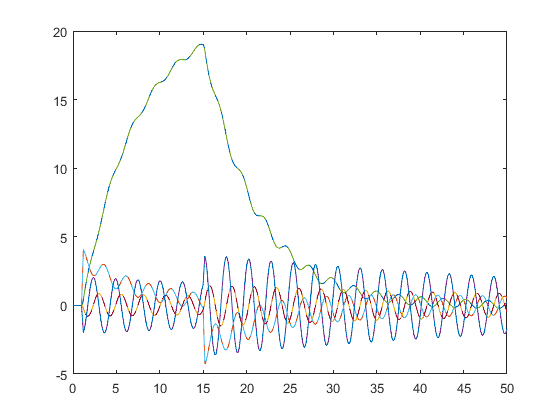

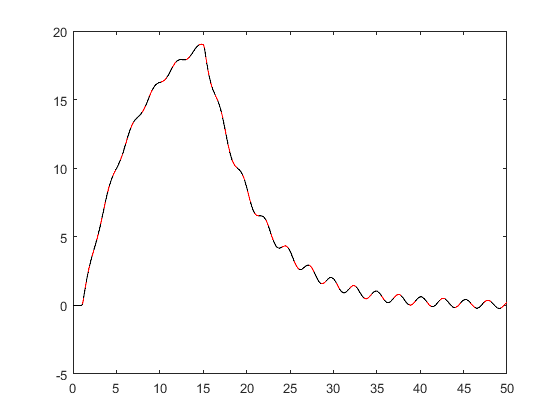

In [13]:
dt = .01;
t = 0:dt:50;

u = 0*t;
u(100:120) = 100;     % impulse
u(1500:1520) = -100;  % impulse

[y,t] = lsim(sysC,u,t);
[xtrue,t] = lsim(sysFullOutput,u,t);
[x_est,t] = lsim(sysKF,[u; y'],t);

plot(t,xtrue,'-',t,x_est,'--','LineWidth',1)

figure
plot(t,y)
hold on
plot(t,xtrue(:,1),'r')
plot(t,x_est(:,1),'k--')

可以看到 4 个状态量都是相等的！